# Problem Statement
Your client is a financial distribution company. Over the last 10 years, they have created an offline distribution channel across the country. They sell financial products to consumers by hiring agents in their network. These agents are freelancers and get a commission when they make a product sale.

Overview of your client onboarding process

    The managers at your client are primarily responsible for recruiting agents. Once a manager has identified a potential applicant he would explain the business opportunity to the agent. Once the agent provides the consent, an application is made to your client to become an agent. In the next 3 months, this potential agent has to undergo a 7 days training at your client's branch (about sales processes and various products) and clear a subsequent examination in order to become an agent.

The problem - who are the best agents?

    As it is obvious in the above process, there is a significant investment which your client makes in identifying, training, and recruiting these agents. However, there are a set of agents who do not bring in the expected resultant business. Your client is looking for help from data scientists like you to help them provide insights using their past recruitment data. They want to predict the target variable for each potential agent which would help them identify the right agents to hire.

Key Points: The evaluation metric to be used is ROC-AUC.

Data 
Variable	Definition
ID	Unique Application ID
Office_PIN	PINCODE of Your client's Offices
Applicant_City_PIN	PINCODE of Applicant Address
Applicant_Gender	Applicant's Gender
Applicant_Marital_Status	Applicant's Marital Status
Applicant_Occupation	Applicant's Occupation
Applicant_Qualification	Applicant's Educational Qualification
Manager_Joining_Designation	Manager's Joining Designation
Manager_Current_Designation	Manager's Designation at the time of application sourcing
Manager_Grade	Manager's Grade
Manager_Status	Current Employment Status (Probation/Confirmation)
Manager_Gender	Manager's Gender
Manager_Num_Application	Number of Applications sourced in the last 3 months by the Manager
Manager_Num_Coded	Number of agents recruited by the manager in the last 3 months
Manager_Business	Amount of business sourced by the manager in the last 3 months
Manager_Num_Products	Number of products sold by the manager in the last 3 months
Manager_Business2	Amount of business sourced by the manager in the last 3 months excluding business from their Category A advisor
Manager_Num_Products2	Number of products sold by the manager in the last 3 months excluding business from their Category A advisor
Business_Sourced(Target)	Business sourced by the applicant within 3 months [1/0] of recruitment



In [1]:
# Importing essesntial Libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [2]:
# Reading Dataset
df= pd.read_csv("Train_pjb2QcD.csv")
df.head(10)

,ID,Office_PIN,Applicant_City_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,844120,M,M,Others,Graduate,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,844111,M,S,Others,Class XII,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,844101,M,M,Business,Class XII,Level 1,Level 1,2.0,Confirmation,M,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,814112,M,S,Salaried,Class XII,Level 1,Level 3,4.0,Confirmation,F,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,815351,M,M,Others,Class XII,Level 1,Level 1,2.0,Confirmation,M,2.0,1.0,230402.0,17.0,230402.0,17.0,0
5,FIN1000006,814112,814114,M,S,Others,Class XII,Level 1,Level 1,2.0,Confirmation,M,0.0,0.0,247118.0,24.0,247118.0,24.0,1
6,FIN1000007,842001,844118,M,M,Business,Class XII,Level 1,Level 1,2.0,Confirmation,M,0.0,0.0,315119.0,27.0,315119.0,27.0,1
7,FIN1000008,800001,844103,M,M,Salaried,Class XII,Level 1,Level 1,2.0,Confirmation,M,5.0,4.0,117358.0,9.0,117358.0,9.0,0
8,FIN1000009,209625,206451,M,M,Business,Graduate,Level 1,Level 2,3.0,Confirmation,M,0.0,0.0,244028.0,17.0,244028.0,17.0,1
9,FIN1000010,211001,212218,M,M,Others,Class XII,Level 1,Level 3,4.0,Confirmation,M,0.0,0.0,851557.0,39.0,851557.0,39.0,1


In [3]:
df.columns

Index(['ID', 'Office_PIN', 'Applicant_City_PIN', 'Applicant_Gender',
       'Applicant_Marital_Status', 'Applicant_Occupation',
       'Applicant_Qualification', 'Manager_Joining_Designation',
       'Manager_Current_Designation', 'Manager_Grade', 'Manager_Status',
       'Manager_Gender', 'Manager_Num_Application', 'Manager_Num_Coded',
       'Manager_Business', 'Manager_Num_Products', 'Manager_Business2',
       'Manager_Num_Products2', 'Business_Sourced'],
      dtype='object')

In [4]:
df.dtypes

ID                              object
Office_PIN                       int64
Applicant_City_PIN               int64
Applicant_Gender                object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
dtype: object

In [5]:
df.describe()

,Office_PIN,Applicant_City_PIN,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
count,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8.844000e+03,8844.000000,8.844000e+03,8844.000000,8844.000000
mean,450714.378562,452638.591022,3.264134,1.939733,0.758933,1.843710e+05,7.152307,1.829263e+05,7.131275,0.342718
std,234079.460837,238045.727919,1.137449,2.150529,1.188644,2.747163e+05,8.439351,2.718021e+05,8.423597,0.474645
min,110005.000000,110001.000000,1.000000,0.000000,0.000000,-2.652890e+05,0.000000,-2.652890e+05,0.000000,0.000000
25%,226001.000000,226002.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
50%,416001.000000,422001.000000,3.000000,1.000000,0.000000,1.021780e+05,5.000000,1.017140e+05,5.000000,0.000000
75%,695014.000000,695009.000000,4.000000,3.000000,1.000000,2.471165e+05,11.000000,2.464612e+05,11.000000,1.000000
max,851101.000000,995657.000000,10.000000,22.000000,9.000000,3.578265e+06,101.000000,3.578265e+06,101.000000,1.000000


In [6]:
df.corr()

,Office_PIN,Applicant_City_PIN,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
Office_PIN,1.000000,0.967030,-0.077063,0.061672,0.066030,0.093603,0.132186,0.093386,0.131747,0.037536
Applicant_City_PIN,0.967030,1.000000,-0.092160,0.051295,0.057324,0.087860,0.130968,0.087718,0.130548,0.039544
Manager_Grade,-0.077063,-0.092160,1.000000,-0.022524,-0.002833,0.322211,0.210353,0.320644,0.209886,0.059363
Manager_Num_Application,0.061672,0.051295,-0.022524,1.000000,0.514299,0.014605,-0.030293,0.015871,-0.029977,-0.037593
Manager_Num_Coded,0.066030,0.057324,-0.002833,0.514299,1.000000,0.152858,0.129490,0.155289,0.130039,0.013565
Manager_Business,0.093603,0.087860,0.322211,0.014605,0.152858,1.000000,0.733880,0.994422,0.729147,0.031578
Manager_Num_Products,0.132186,0.130968,0.210353,-0.030293,0.129490,0.733880,1.000000,0.736272,0.998893,-0.011000
Manager_Business2,0.093386,0.087718,0.320644,0.015871,0.155289,0.994422,0.736272,1.000000,0.735594,0.031093
Manager_Num_Products2,0.131747,0.130548,0.209886,-0.029977,0.130039,0.729147,0.998893,0.735594,1.000000,-0.011706
Business_Sourced,0.037536,0.039544,0.059363,-0.037593,0.013565,0.031578,-0.011000,0.031093,-0.011706,1.000000


## Imputing Missing values

In [7]:
df.isnull().sum()

ID                                0
Office_PIN                        0
Applicant_City_PIN                0
Applicant_Gender                 53
Applicant_Marital_Status         59
Applicant_Occupation           1090
Applicant_Qualification          71
Manager_Joining_Designation       0
Manager_Current_Designation       0
Manager_Grade                     0
Manager_Status                    0
Manager_Gender                    0
Manager_Num_Application           0
Manager_Num_Coded                 0
Manager_Business                  0
Manager_Num_Products              0
Manager_Business2                 0
Manager_Num_Products2             0
Business_Sourced                  0
dtype: int64

In [8]:
df['Applicant_Gender'].value_counts()

M    6656
F    2135
Name: Applicant_Gender, dtype: int64

In [9]:
#Imputing  missing values with mode
df['Applicant_Gender'].fillna('M', inplace=True)

In [10]:
df['Applicant_Marital_Status'].value_counts()

M    5733
S    3042
W       6
D       4
Name: Applicant_Marital_Status, dtype: int64

In [11]:
#Imputing  missing values with mode
df['Applicant_Marital_Status'].fillna('M', inplace=True)

In [12]:
df['Applicant_Occupation'].value_counts()

Salaried         3546
Business         2157
Others           1809
Self Employed     146
Student            96
Name: Applicant_Occupation, dtype: int64

In [13]:
#Imputing  missing values with mode
df['Applicant_Occupation'].fillna('Salaried', inplace=True)

In [14]:
df['Applicant_Qualification'].value_counts()

Class XII                                                           5426
Graduate                                                            2958
Class X                                                              195
Others                                                               116
Masters of Business Administration                                    71
Associate / Fellow of Institute of Chartered Accountans of India       3
Associate/Fellow of Acturial Society of India                          1
Professional Qualification in Marketing                                1
Associate/Fellow of Insurance Institute of India                       1
Associate/Fellow of Institute of Company Secretories of India          1
Name: Applicant_Qualification, dtype: int64

In [15]:
df['Applicant_Qualification'].fillna('Class XII', inplace=True)

In [16]:
df.isnull().sum()

ID                             0
Office_PIN                     0
Applicant_City_PIN             0
Applicant_Gender               0
Applicant_Marital_Status       0
Applicant_Occupation           0
Applicant_Qualification        0
Manager_Joining_Designation    0
Manager_Current_Designation    0
Manager_Grade                  0
Manager_Status                 0
Manager_Gender                 0
Manager_Num_Application        0
Manager_Num_Coded              0
Manager_Business               0
Manager_Num_Products           0
Manager_Business2              0
Manager_Num_Products2          0
Business_Sourced               0
dtype: int64

### All missing values imputed with their mode.

## Dealing with categorical variables

In [17]:
df.columns

Index(['ID', 'Office_PIN', 'Applicant_City_PIN', 'Applicant_Gender',
       'Applicant_Marital_Status', 'Applicant_Occupation',
       'Applicant_Qualification', 'Manager_Joining_Designation',
       'Manager_Current_Designation', 'Manager_Grade', 'Manager_Status',
       'Manager_Gender', 'Manager_Num_Application', 'Manager_Num_Coded',
       'Manager_Business', 'Manager_Num_Products', 'Manager_Business2',
       'Manager_Num_Products2', 'Business_Sourced'],
      dtype='object')

In [18]:
cat_cols=['Applicant_Gender','Applicant_Marital_Status','Applicant_Occupation','Applicant_Qualification','Manager_Joining_Designation', 'Manager_Current_Designation', 'Manager_Status', 'Manager_Gender']

In [19]:
for col in cat_cols:
    print(f"-----   {col}   -----")
    print(df[col].value_counts())
    print("")

-----   Applicant_Gender   -----
M    6709
F    2135
Name: Applicant_Gender, dtype: int64

-----   Applicant_Marital_Status   -----
M    5792
S    3042
W       6
D       4
Name: Applicant_Marital_Status, dtype: int64

-----   Applicant_Occupation   -----
Salaried         4636
Business         2157
Others           1809
Self Employed     146
Student            96
Name: Applicant_Occupation, dtype: int64

-----   Applicant_Qualification   -----
Class XII                                                           5497
Graduate                                                            2958
Class X                                                              195
Others                                                               116
Masters of Business Administration                                    71
Associate / Fellow of Institute of Chartered Accountans of India       3
Associate/Fellow of Acturial Society of India                          1
Professional Qualification in Marketing   

#### No inacurate data found.

In [20]:
df.head()

,ID,Office_PIN,Applicant_City_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,844120,M,M,Others,Graduate,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,844111,M,S,Others,Class XII,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,844101,M,M,Business,Class XII,Level 1,Level 1,2.0,Confirmation,M,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,814112,M,S,Salaried,Class XII,Level 1,Level 3,4.0,Confirmation,F,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,815351,M,M,Others,Class XII,Level 1,Level 1,2.0,Confirmation,M,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [21]:
df.dtypes

ID                              object
Office_PIN                       int64
Applicant_City_PIN               int64
Applicant_Gender                object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
dtype: object

In [22]:
df= df.drop(['ID'], axis=1)

In [23]:
df= pd.get_dummies(df)

In [24]:
df.head()

,Office_PIN,Applicant_City_PIN,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,...,Manager_Joining_Designation_Other,Manager_Current_Designation_Level 1,Manager_Current_Designation_Level 2,Manager_Current_Designation_Level 3,Manager_Current_Designation_Level 4,Manager_Current_Designation_Level 5,Manager_Status_Confirmation,Manager_Status_Probation,Manager_Gender_F,Manager_Gender_M
0,842001,844120,3.0,2.0,1.0,335249.0,28.0,335249.0,28.0,0,...,0,0,1,0,0,0,1,0,0,1
1,842001,844111,3.0,2.0,1.0,335249.0,28.0,335249.0,28.0,1,...,0,0,1,0,0,0,1,0,0,1
2,800001,844101,2.0,0.0,0.0,357184.0,24.0,357184.0,24.0,0,...,0,1,0,0,0,0,1,0,0,1
3,814112,814112,4.0,0.0,0.0,318356.0,22.0,318356.0,22.0,0,...,0,0,0,1,0,0,1,0,1,0
4,814112,815351,2.0,2.0,1.0,230402.0,17.0,230402.0,17.0,0,...,0,1,0,0,0,0,1,0,0,1


## Logistic Regression

# Segregating dependent and independent variables

In [25]:
x = df.drop(['Business_Sourced'], axis=1)
y = df['Business_Sourced']
x.shape, y.shape

((8844, 47), (8844,))

In [26]:
from sklearn.model_selection import train_test_split
trainx, testx, trainy, testy = train_test_split(x, y, test_size= 0.3, random_state= 42, stratify=y)
trainx.shape, testx.shape

((6190, 47), (2654, 47))

In [27]:
# Importing essential Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, auc
from sklearn.metrics import roc_auc_score

In [28]:
# Training the model
logreg = LogisticRegression()
logreg.fit(trainx, trainy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
pred_train= logreg.predict(trainx)
pred_test= logreg.predict(testx)

In [30]:
# roc_auc_score on train set
roc_auc_score(trainy, pred_train[:])

0.5001128575449266

In [31]:
# roc_auc_score on test set
roc_auc_score(testy, pred_test[:])

0.5

AUC Score Pretty low for now    :(

## Implementing Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
# Training Model
rfc.fit(trainx, trainy) 
# Finding Score
sc=rfc.score(testx, testy)
# Printing score
print(f'Score = {(score*100).round(2)}')

Score = 65.03


### Significant increase in accuracy gained just by using Random Forest model in place of Logitic Regressor

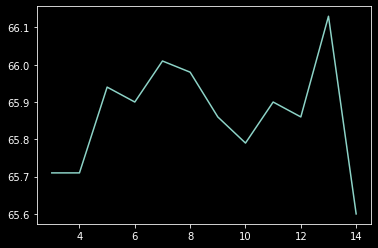

In [58]:
# Altering hyper-parameters
ran = range(3,15)
scores=[]
for i in ran:
    rfc = RandomForestClassifier(max_depth = i)
    # Training Model
    rfc.fit(trainx, trainy) 
    # Finding Score
    sc=rfc.score(testx, testy)
    scores.append((sc*100).round(2))
import matplotlib.pyplot as plt 
plt.plot (ran ,scores)

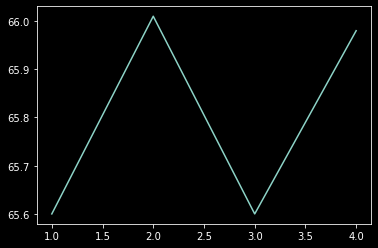

In [59]:
# Altering hyper-parameters
ran = range(1,5)
scores=[]
for i in ran:
    rfc = RandomForestClassifier(max_depth = 7, min_samples_leaf = i)
    # Training Model
    rfc.fit(trainx, trainy) 
    # Finding Score
    sc=rfc.score(testx, testy)
    scores.append((sc*100).round(2))
import matplotlib.pyplot as plt 
plt.plot (ran ,scores)

In [63]:
# Hyper-Parameters= max_depth = 7, min_samples_leaf = 2
# Final Model
rfc = RandomForestClassifier(max_depth = 7, min_samples_leaf = 2)
# Training Model
rfc.fit(trainx, trainy) 
# Finding Score
sc=rfc.score(testx, testy)
# Printing score
print(f'Score = {(score*100).round(2)}')

Score = 65.03


### No change in score, it shows that model has automatically choosed the best values for the problem.
##Final Accuracy = 65%